In [22]:
from __future__ import print_function, division
%matplotlib inline
from matplotlib import pyplot as plt
import json
import random
import numpy as np

import debiaswe as dwe
import debiaswe.we as we
from debiaswe.we import WordEmbedding
from debiaswe.data import load_professions


In [9]:
# load google news word2vec
E = WordEmbedding('./w2v_gnews_small.txt')

# load professions
professions = load_professions()
profession_words = [p[0] for p in professions]

*** Reading data from ./w2v_gnews_small.txt
(26423, 300)
26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
Loaded professions
Format:
word,
definitional female -1.0 -> definitional male 1.0
stereotypical female -1.0 -> stereotypical male 1.0


In [10]:
professions = load_professions()
profession_words = [p[0] for p in professions]


Loaded professions
Format:
word,
definitional female -1.0 -> definitional male 1.0
stereotypical female -1.0 -> stereotypical male 1.0


In [11]:
v_gender = E.diff('she', 'he')
# analogies gender
a_gender = E.best_analogies_dist_thresh(v_gender)

for (a,b,c) in a_gender:
    print(a+"-"+b)

Computing neighbors
Mean: 10.219732808538016
Median: 7.0
she-he
herself-himself
her-his
woman-man
daughter-son
businesswoman-businessman
girl-boy
actress-actor
chairwoman-chairman
heroine-hero
mother-father
spokeswoman-spokesman
sister-brother
girls-boys
sisters-brothers
queen-king
niece-nephew
councilwoman-councilman
motherhood-fatherhood
women-men
petite-lanky
ovarian_cancer-prostate_cancer
Anne-John
schoolgirl-schoolboy
granddaughter-grandson
aunt-uncle
matriarch-patriarch
twin_sister-twin_brother
mom-dad
lesbian-gay
husband-younger_brother
gal-dude
lady-gentleman
sorority-fraternity
mothers-fathers
grandmother-grandfather
blouse-shirt
soprano-baritone
queens-kings
Jill-Greg
daughters-sons
grandma-grandpa
volleyball-football
diva-superstar
mommy-kid
Sarah-Matthew
hairdresser-barber
softball-baseball
goddess-god
Aisha-Jamal
waitress-waiter
princess-prince
filly-colt
mare-gelding
ladies-gentlemen
childhood-boyhood
interior_designer-architect
nun-priest
wig-beard
granddaughters-grandso

In [12]:
#The script will output the profession words sorted with respect to the projection score in the direction of gender.
sp = sorted([(E.v(w).dot(v_gender), w) for w in profession_words])

sp[0:20], sp[-20:]

([(-0.23798442, 'maestro'),
  (-0.21665451, 'statesman'),
  (-0.2075867, 'skipper'),
  (-0.20267203, 'protege'),
  (-0.20206761, 'businessman'),
  (-0.19492391, 'sportsman'),
  (-0.18836352, 'philosopher'),
  (-0.1807366, 'marksman'),
  (-0.17289859, 'captain'),
  (-0.16785556, 'architect'),
  (-0.16702037, 'financier'),
  (-0.1631364, 'warrior'),
  (-0.15280864, 'major_leaguer'),
  (-0.15001445, 'trumpeter'),
  (-0.14718868, 'broadcaster'),
  (-0.14637241, 'magician'),
  (-0.14401694, 'fighter_pilot'),
  (-0.13782285, 'boss'),
  (-0.13718201, 'industrialist'),
  (-0.13684887, 'pundit')],
 [(0.19714224, 'interior_designer'),
  (0.20833439, 'housekeeper'),
  (0.21560377, 'stylist'),
  (0.22363171, 'bookkeeper'),
  (0.23776126, 'maid'),
  (0.24125953, 'nun'),
  (0.24782577, 'nanny'),
  (0.24929333, 'hairdresser'),
  (0.24946159, 'paralegal'),
  (0.25276467, 'ballerina'),
  (0.2571882, 'socialite'),
  (0.26647124, 'librarian'),
  (0.27317625, 'receptionist'),
  (0.2754029, 'waitress'),
  

In [26]:
from debiaswe.debias import debias
# Lets load some gender related word lists to help us with debiasing
with open('./data/definitional_pairs.json', "r") as f:
    defs = json.load(f)

with open('./data/equalize_pairs.json', "r") as f:
    equalize_pairs = json.load(f)

with open('./data/gender_specific_seed.json', "r") as f:
    gender_specific_words = json.load(f)
debias(E, gender_specific_words, defs, equalize_pairs)
sp_debiased = sorted([(E.v(w).dot(v_gender), w) for w in profession_words])

sp_debiased[0:20], sp_debiased[-20:]

26423 words of dimension 300 : in, for, that, is, ..., Jay, Leroy, Brad, Jermaine
{('wives', 'husbands'), ('man', 'woman'), ('father', 'mother'), ('Grandfather', 'Grandmother'), ('Monastery', 'Convent'), ('Colt', 'Filly'), ('HIMSELF', 'HERSELF'), ('Brother', 'Sister'), ('MAN', 'WOMAN'), ('Grandpa', 'Grandma'), ('TESTOSTERONE', 'ESTROGEN'), ('GENTLEMEN', 'LADIES'), ('Sons', 'Daughters'), ('gentlemen', 'ladies'), ('BROTHER', 'SISTER'), ('dudes', 'gals'), ('BUSINESSMAN', 'BUSINESSWOMAN'), ('dad', 'mom'), ('Males', 'Females'), ('he', 'she'), ('Father', 'Mother'), ('Prostate_Cancer', 'Ovarian_Cancer'), ('boys', 'girls'), ('grandpa', 'grandma'), ('brothers', 'sisters'), ('Nephew', 'Niece'), ('nephew', 'niece'), ('prince', 'princess'), ('CATHOLIC_PRIEST', 'NUN'), ('fatherhood', 'motherhood'), ('chairman', 'chairwoman'), ('CHAIRMAN', 'CHAIRWOMAN'), ('gelding', 'mare'), ('uncle', 'aunt'), ('Uncle', 'Aunt'), ('FELLA', 'GRANNY'), ('FATHERHOOD', 'MOTHERHOOD'), ('brother', 'sister'), ('NEPHEW', 'NI

([(-0.41963252, 'congressman'),
  (-0.4067585, 'businessman'),
  (-0.32398775, 'councilman'),
  (-0.3096709, 'dad'),
  (-0.21665451, 'statesman'),
  (-0.11345412, 'salesman'),
  (-0.073004864, 'monk'),
  (-0.072163954, 'handyman'),
  (-0.04946821, 'minister'),
  (-0.043583855, 'archbishop'),
  (-0.040207192, 'bishop'),
  (-0.038332455, 'commissioner'),
  (-0.03572437, 'surgeon'),
  (-0.033133976, 'trader'),
  (-0.032377172, 'observer'),
  (-0.03209582, 'neurosurgeon'),
  (-0.031450074, 'priest'),
  (-0.03113396, 'skipper'),
  (-0.029659154, 'lawmaker'),
  (-0.029511206, 'commander')],
 [(0.029965647, 'teenager'),
  (0.030237041, 'instructor'),
  (0.030946167, 'student'),
  (0.031117015, 'paralegal'),
  (0.032039437, 'bookkeeper'),
  (0.03243465, 'cinematographer'),
  (0.03432906, 'graphic_designer'),
  (0.034705672, 'lifeguard'),
  (0.03566657, 'janitor'),
  (0.03597196, 'drummer'),
  (0.042120133, 'wrestler'),
  (0.04390224, 'hairdresser'),
  (0.04813317, 'firefighter'),
  (0.23776129

In [39]:
profession_value=[]# the value of each profession in gender direction
profession_value_debiased=[] #the value of each profession in gender direction after debiasing
profession_name=[] # the name of each profession
for word in sp:
   
    profession_name.append(word[1])
    profession_value.append(word[0])
for i in profession_name:
    for prof in sp_debiased:
        if (i==prof[1]) :
            profession_value_debiased.append(prof[0])
print( profession_value[0:10])
print( profession_value_debiased[0:10])
print (profession_name[0:10])
    

[-0.23798442, -0.21665451, -0.2075867, -0.20267203, -0.20206761, -0.19492391, -0.18836352, -0.1807366, -0.17289859, -0.16785556]
[-0.007210631, -0.21665451, -0.03113396, 0.021232177, -0.4067585, 0.00284186, -0.0029288717, 0.0007870542, -0.028020652, -0.00022799894]
['maestro', 'statesman', 'skipper', 'protege', 'businessman', 'sportsman', 'philosopher', 'marksman', 'captain', 'architect']


In [38]:
#we began to plot scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


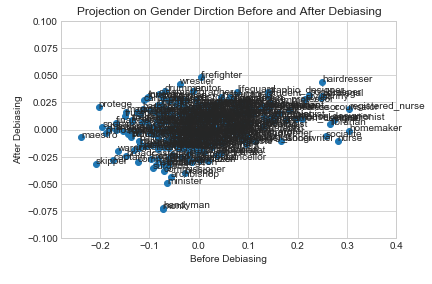

In [42]:
fig, ax=plt.subplots()
plt.title('Projection on Gender Dirction Before and After Debiasing')
plt.xlabel('Before Debiasing')
plt.ylabel('After Debiasing')
plt.ylim(-0.1,0.1)
ax.scatter(profession_value,profession_value_debiased)
for i, txt in enumerate(profession_name):
    ax.annotate(txt,(profession_value[i],profession_value_debiased[i]))